In [1]:
import numpy as np
import matplotlib.pyplot as plt

from edm import NumpyEDM1

In [2]:
env = NumpyEDM1(1)

## sparking at place becomes less and less efficient due to debris

In [3]:
obs = [env.reset()]
ends = []
rewards = []
ds = []
for _ in range(5000):
    ob, reward, end, _ = env.step(0)
    obs.append(ob)
    rewards.append(reward)
    ends.append(end)
    ds.append(env.z_electrode - env.z_material)
    
obs = np.stack(obs)

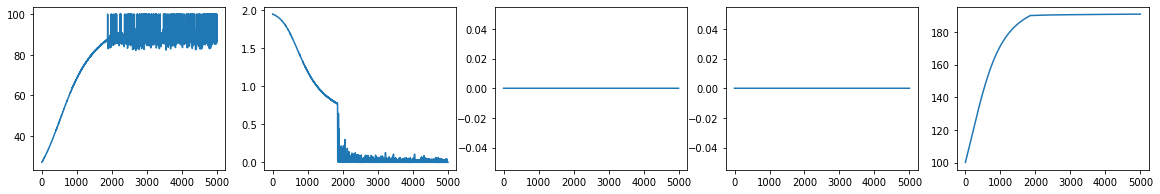

In [4]:
fig, axen = plt.subplots(1, 5, figsize=(20, 3))

axen[0].plot(obs[:, 0])
axen[1].plot(obs[:, 1])
axen[2].plot(rewards)
axen[3].plot(ends)
axen[4].plot(ds)

## sparking at place and flushing stops sparking due to distance

In [5]:
obs = [env.reset()]
ends = []
rewards = []
ds = []
actions = []
for step in range(1, 5000):
    action = 3 if step % 1000 == 0 else 0
    ob, reward, end, _ = env.step(action)
    obs.append(ob)
    rewards.append(reward)
    ends.append(end)
    ds.append(env.z_electrode - env.z_material)
    actions.append(action)
    
obs = np.stack(obs)

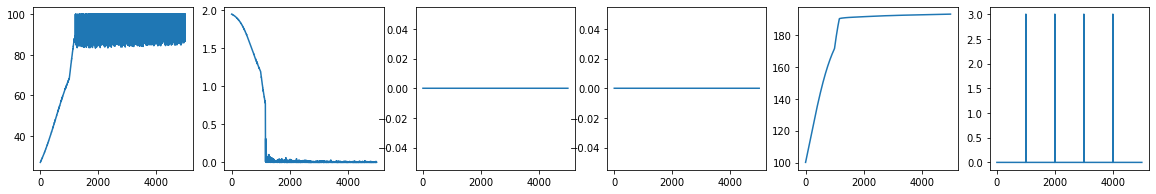

In [6]:
fig, axen = plt.subplots(1, 6, figsize=(20, 3))

axen[0].plot(obs[:, 0])
axen[1].plot(obs[:, 1])
axen[2].plot(rewards)
axen[3].plot(ends)
axen[4].plot(ds)
axen[5].plot(actions)

## moving down loses when electrode touches material

In [11]:
obs = [env.reset()]
ends = []
rewards = []
ds = []
for step in range(100):
    ob, reward, end, _ = env.step(1)
    obs.append(ob)
    rewards.append(reward)
    ends.append(end)
    ds.append(env.z_electrode - env.z_material)
    if end:
        break
    
obs = np.stack(obs)

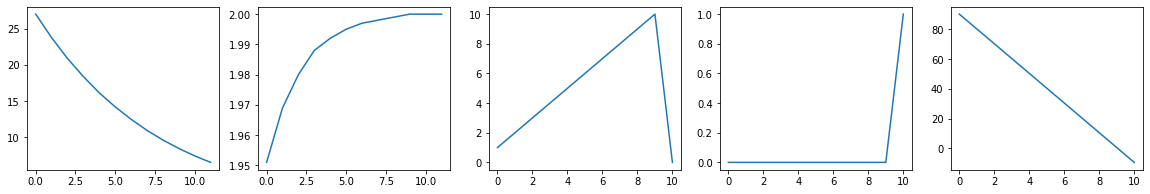

In [12]:
fig, axen = plt.subplots(1, 5, figsize=(20, 3))

axen[0].plot(obs[:, 0])
axen[1].plot(obs[:, 1])
axen[2].plot(np.cumsum(rewards))
axen[3].plot(ends)
axen[4].plot(ds)

## three strategies - good, too slow, and too fast

In [13]:
# advance_every = 100 # too fast - hits the material
# advance_every = 159 # good
advance_every = 201 # too slow - stops sparking

obs = [env.reset()]
ends = []
rewards = []
ds = []
actions = []
for step in range(1, 5000):
    
    if step % 1000 == 0:
        action = 3
    elif step % advance_every == 0:
        action = 1
    else:
        action = 0
    
    ob, reward, end, _ = env.step(action)    
    obs.append(ob)
    rewards.append(reward)
    ends.append(end)
    ds.append(env.z_electrode - env.z_material)
    actions.append(action)
    if end:
        break
    
obs = np.stack(obs)

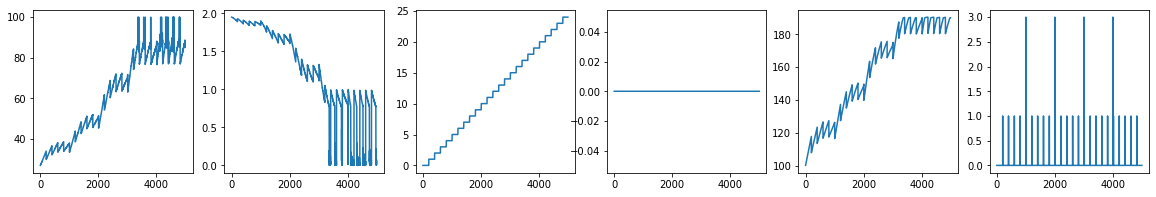

In [14]:
fig, axen = plt.subplots(1, 6, figsize=(20, 3))

axen[0].plot(obs[:, 0])
axen[1].plot(obs[:, 1])
axen[2].plot(np.cumsum(rewards))
axen[3].plot(ends)
axen[4].plot(ds)
axen[5].plot(actions)